In [1]:
from distributed import Client, LocalCluster
from dask import delayed
import dask

In [11]:
cluster = LocalCluster(dashboard_address=':8787')
client = Client(cluster)  

In [2]:
def execute_sim(arg1, arg2, arg3):
    return arg1+arg2+arg3

simulation_arg1s = [1, 2, 3, 4]
simulation_arg2s = [5, 6, 7, 8]
simulation_arg3s = [9, 8, 7, 6]

## Delayed Example

In [3]:
delayed_execute_sim = delayed(execute_sim)
delayed_execute_sim

Delayed('execute_sim-91254d6e-6bb7-4d13-a516-75243819ba57')

In [4]:
delayed_result = delayed_execute_sim(1,2,3)

# get the result 
result = dask.compute(delayed_result) # begins computation, returns a tuple
print(f'result is {result}')

result is (6,)


In [7]:
delayed_results = [0]
for arg1, arg2, arg3 in zip(simulation_arg1s, simulation_arg2s, simulation_arg3s):
    result = delayed_execute_sim(arg1, arg2, arg3) + delayed_results[-1]
    delayed_results.append(result)

# dask.compute(*delayed_results)  # begins computation

--------------------------------

In [9]:
r = delayed_results[-1]

In [12]:
c1 = client
cluster2 = LocalCluster(dashboard_address=':8788')
c2 = Client(cluster2)  

In [13]:
c1

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.41 GiB
Comm: tcp://127.0.0.1:42881,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.41 GiB
Comm: tcp://127.0.0.1:45517,Total threads: 2
Dashboard: http://127.0.0.1:37731/status,Memory: 3.85 GiB
Nanny: tcp://127.0.0.1:40457,


In [14]:
c2

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8788/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8788/status,Workers: 4
Total threads: 8,Total memory: 15.41 GiB
Comm: tcp://127.0.0.1:41405,Workers: 4
Dashboard: http://127.0.0.1:8788/status,Total threads: 8
Started: Just now,Total memory: 15.41 GiB
Comm: tcp://127.0.0.1:38373,Total threads: 2
Dashboard: http://127.0.0.1:36823/status,Memory: 3.85 GiB
Nanny: tcp://127.0.0.1:32827,


In [22]:
r.__dask_graph__()

layer_type,MaterializedLayer
is_materialized,True
layer_type,MaterializedLayer
is_materialized,True
layer_type,MaterializedLayer
is_materialized,True
layer_type,MaterializedLayer
is_materialized,True
layer_type,MaterializedLayer
is_materialized,True
layer_type,MaterializedLayer


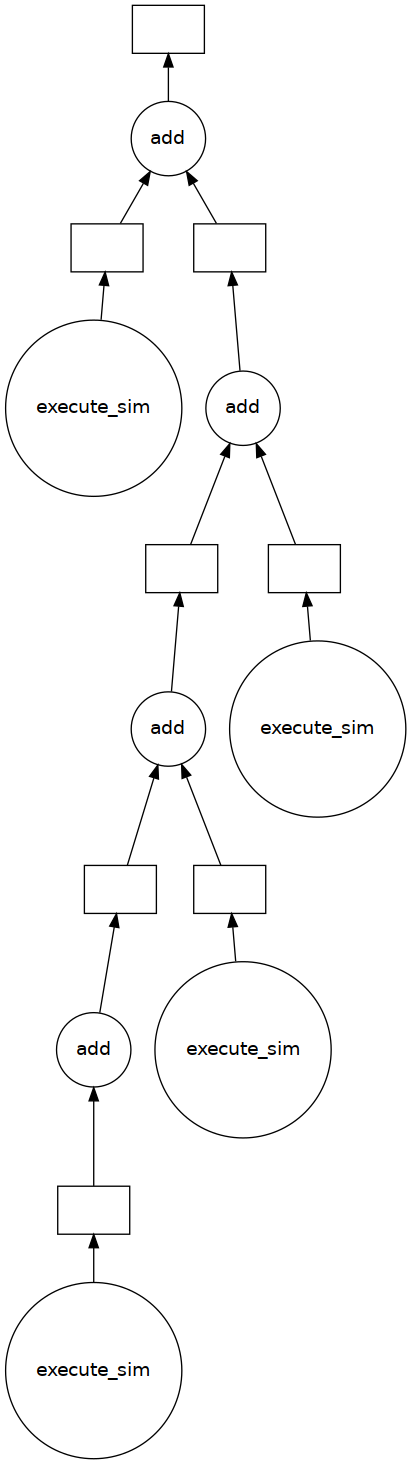

In [23]:
r.visualize()

# Run on cluster 1

In [24]:
f = c1.compute(r)
f.result()

66

# Run on cluster 2

In [26]:
f2 = c2.compute(r)
f2.result()

66